In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/rfmtugas/customer_shopping_data.csv')
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


# Data Preprocessing

In [3]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)

df = df.astype({
    'invoice_no': 'string',
    'customer_id': 'string',
    'gender': 'string',
    'category': 'string',
    'payment_method': 'string',
    'shopping_mall': 'string'
})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  string        
 1   customer_id     99457 non-null  string        
 2   gender          99457 non-null  string        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  string        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  string        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  string        
dtypes: datetime64[ns](1), float64(1), int64(2), string(6)
memory usage: 7.6 MB


# EDA & Visualisasi Data

<Axes: >

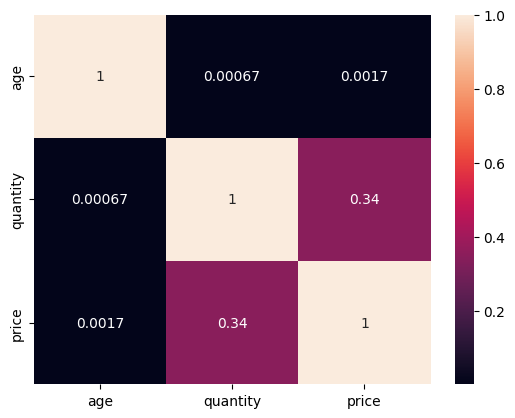

In [6]:
colcat = ['age','quantity','price']
sns.heatmap(df[colcat].corr(),annot=True)

Axes(0.125,0.11;0.775x0.77)


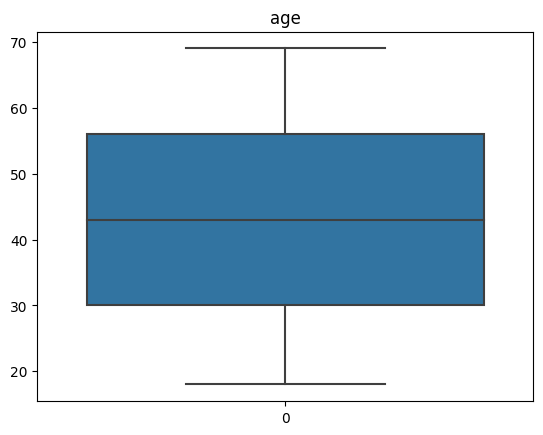

Axes(0.125,0.11;0.775x0.77)


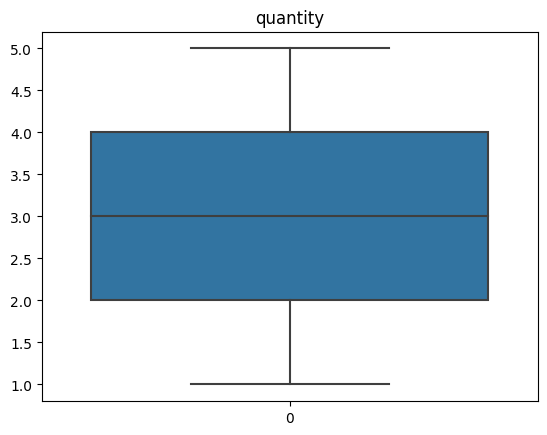

Axes(0.125,0.11;0.775x0.77)


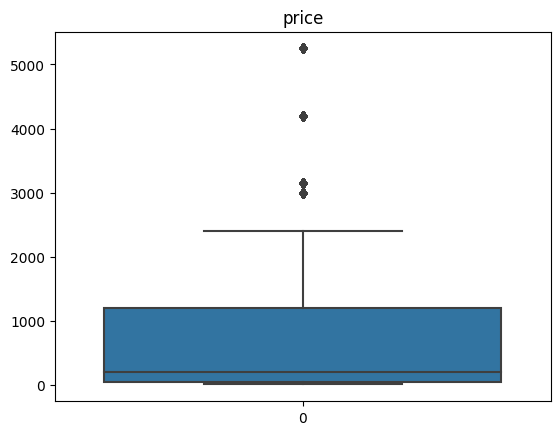

In [7]:
print(sns.boxplot(df['age']))
plt.title('age')
plt.show()
print(sns.boxplot(df['quantity']))
plt.title('quantity')
plt.show()
print(sns.boxplot(df['price']))
plt.title('price')
plt.show()

In [8]:
top_50_percent = df[df['price'] >= df['price'].median()]
lowest_50_percent = df[df['price'] <= df['price'].median()]

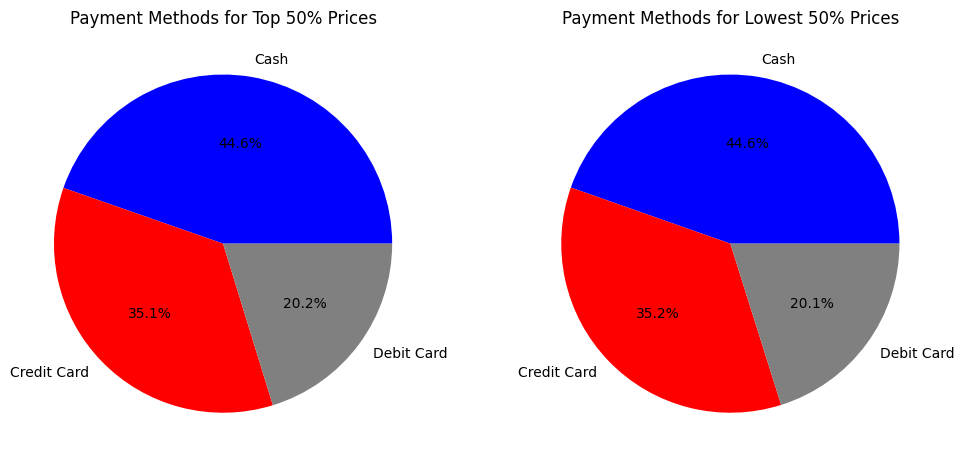

In [9]:
payment_countshigh = top_50_percent['payment_method'].value_counts()
payment_countslow = lowest_50_percent['payment_method'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].pie(payment_countshigh, labels=payment_countshigh.index, autopct='%1.1f%%', colors=['Blue', 'Red', 'Grey'])
axes[0].set_title('Payment Methods for Top 50% Prices')

axes[1].pie(payment_countslow, labels=payment_countslow.index, autopct='%1.1f%%', colors=['Blue', 'Red', 'Grey'])
axes[1].set_title('Payment Methods for Lowest 50% Prices')

plt.show()

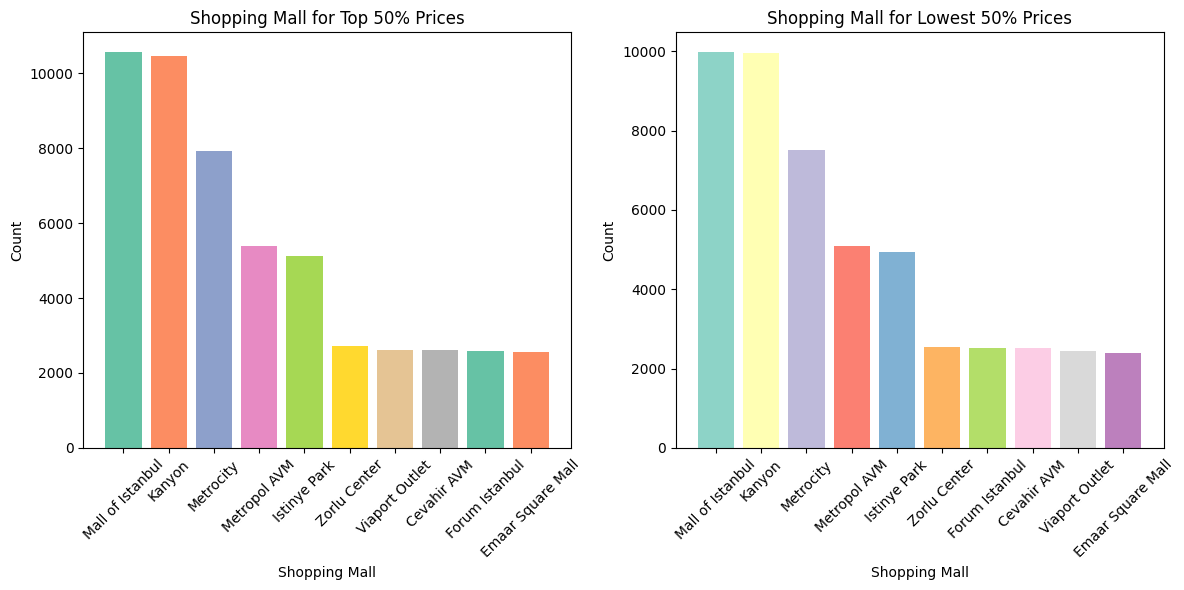

In [10]:
shoppingmall_high = top_50_percent['shopping_mall'].value_counts()
shoppingmall_low = lowest_50_percent['shopping_mall'].value_counts()

colors_high = plt.get_cmap('Set2').colors[:len(shoppingmall_high)]
colors_low = plt.get_cmap('Set3').colors[:len(shoppingmall_low)]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(shoppingmall_high.index, shoppingmall_high, color=colors_high)
axes[0].set_title('Shopping Mall for Top 50% Prices')
axes[0].set_xlabel('Shopping Mall')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(shoppingmall_low.index, shoppingmall_low, color=colors_low)
axes[1].set_title('Shopping Mall for Lowest 50% Prices')
axes[1].set_xlabel('Shopping Mall')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

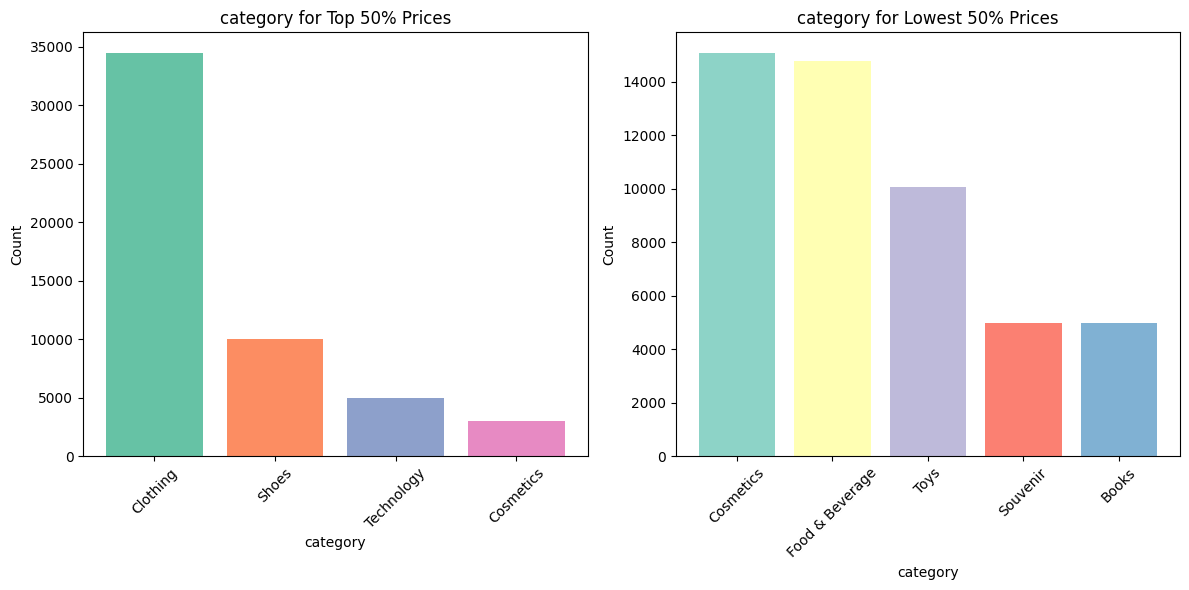

In [12]:
category_high = top_50_percent['category'].value_counts()
category_low = lowest_50_percent['category'].value_counts()

colors_high = plt.get_cmap('Set2').colors[:len(category_high)]
colors_low = plt.get_cmap('Set3').colors[:len(category_low)]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].bar(category_high.index, category_high, color=colors_high)
axes[0].set_title('category for Top 50% Prices')
axes[0].set_xlabel('category')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(category_low.index, category_low, color=colors_low)
axes[1].set_title('category for Lowest 50% Prices')
axes[1].set_xlabel('category')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# RFM Analysis

In [13]:
df['invoice_date'].max()

Timestamp('2023-03-08 00:00:00')

In [14]:
now = pd.Timestamp('2023-04-08')
now

Timestamp('2023-04-08 00:00:00')

In [15]:
recency_df = df.groupby(['customer_id'],as_index=False)['invoice_date'].max()
recency_df.columns = ['customer_id','LastPurchaseDate']
recency_df.head()

,customer_id,LastPurchaseDate
0,C100004,2021-11-26
1,C100005,2023-03-03
2,C100006,2022-12-01
3,C100012,2021-08-15
4,C100019,2021-07-25


In [16]:
recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)

recency_df.drop(columns=['LastPurchaseDate'],inplace=True)

recency_df

,customer_id,Recency
0,C100004,498
1,C100005,36
2,C100006,128
3,C100012,601
4,C100019,622
...,...,...
99452,C999886,31
99453,C999910,154
99454,C999974,333
99455,C999976,292


In [17]:
frequency_df = df.drop_duplicates().groupby(
    by=['customer_id'], as_index=False)['invoice_date'].count()
frequency_df.columns = ['customer_id', 'Frequency']
frequency_df.head()

,customer_id,Frequency
0,C100004,1
1,C100005,1
2,C100006,1
3,C100012,1
4,C100019,1


In [18]:
df[df['category']=='Clothing']

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,2022-05-24,Forum Istanbul
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,2021-01-13,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,2021-11-04,Metrocity
...,...,...,...,...,...,...,...,...,...,...
99435,I141871,C298790,Female,62,Clothing,3,900.24,Cash,2022-02-02,Emaar Square Mall
99436,I579905,C265057,Female,57,Clothing,5,1500.40,Cash,2022-03-27,Cevahir AVM
99440,I887161,C137631,Female,58,Clothing,1,300.08,Cash,2021-06-22,Kanyon
99442,I105959,C131810,Female,45,Clothing,4,1200.32,Debit Card,2021-02-01,Istinye Park


In [19]:
monetary_df = df.groupby(by='customer_id', as_index=False)['price'].sum()
monetary_df.columns = ['customer_id', 'Monetary']
monetary_df.head()

,customer_id,Monetary
0,C100004,1500.40
1,C100005,1200.34
2,C100006,107.52
3,C100012,26.15
4,C100019,35.84


In [20]:
rf_df = recency_df.merge(frequency_df, on='customer_id')
rfm_df = rf_df.merge(monetary_df, on='customer_id')
rfm_df.head()

,customer_id,Recency,Frequency,Monetary
0,C100004,498,1,1500.40
1,C100005,36,1,1200.34
2,C100006,128,1,107.52
3,C100012,601,1,26.15
4,C100019,622,1,35.84


In [21]:
rfm_df["R"] = pd.qcut(rfm_df["Recency"],5,labels=[5,4,3,2,1])
rfm_df["F"] = 1
rfm_df["M"] = pd.qcut(rfm_df["Monetary"],5,labels=[1,2,3,4,5])
rfm_df["RFM_Score"] = rfm_df["R"].astype(str) +rfm_df["F"].astype(str) + rfm_df["M"].astype(str)
rfm_df

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,C100004,498,1,1500.40,3,1,5,315
1,C100005,36,1,1200.34,5,1,5,515
2,C100006,128,1,107.52,5,1,2,512
3,C100012,601,1,26.15,2,1,1,211
4,C100019,622,1,35.84,2,1,1,211
...,...,...,...,...,...,...,...,...
99452,C999886,31,1,15.69,5,1,1,511
99453,C999910,154,1,45.45,5,1,2,512
99454,C999974,333,1,1500.40,4,1,5,415
99455,C999976,292,1,107.52,4,1,2,412


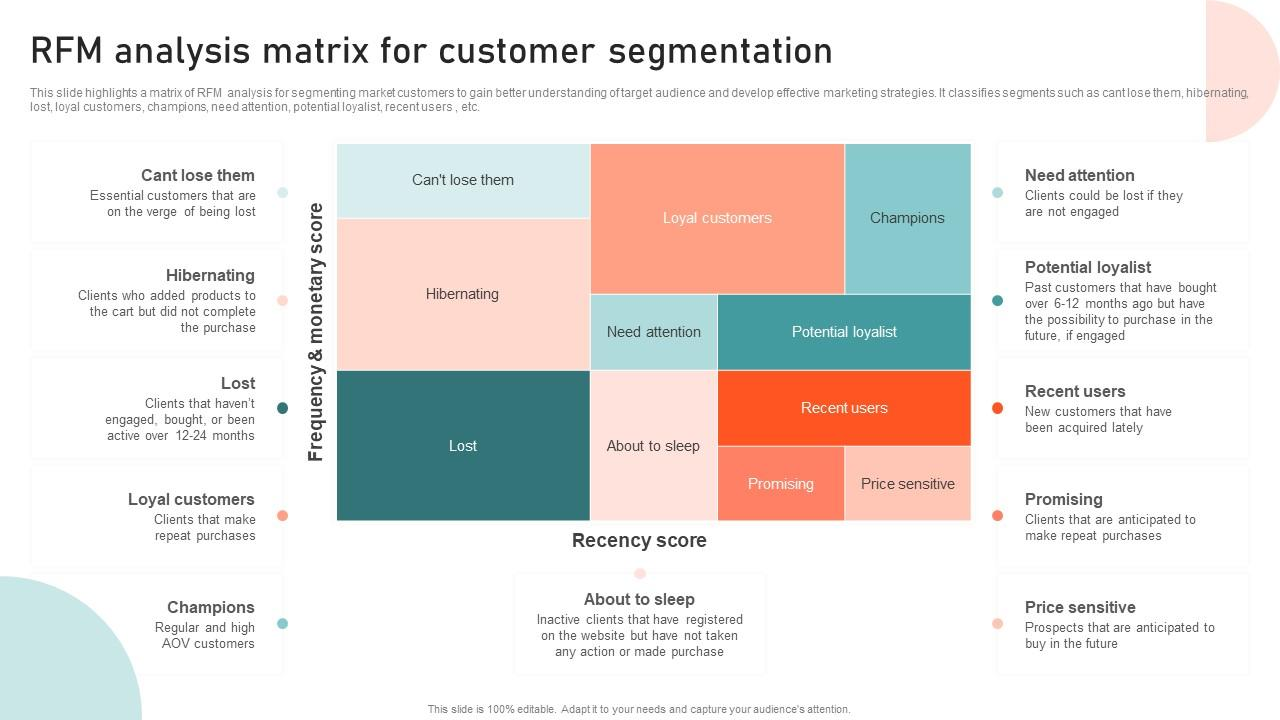
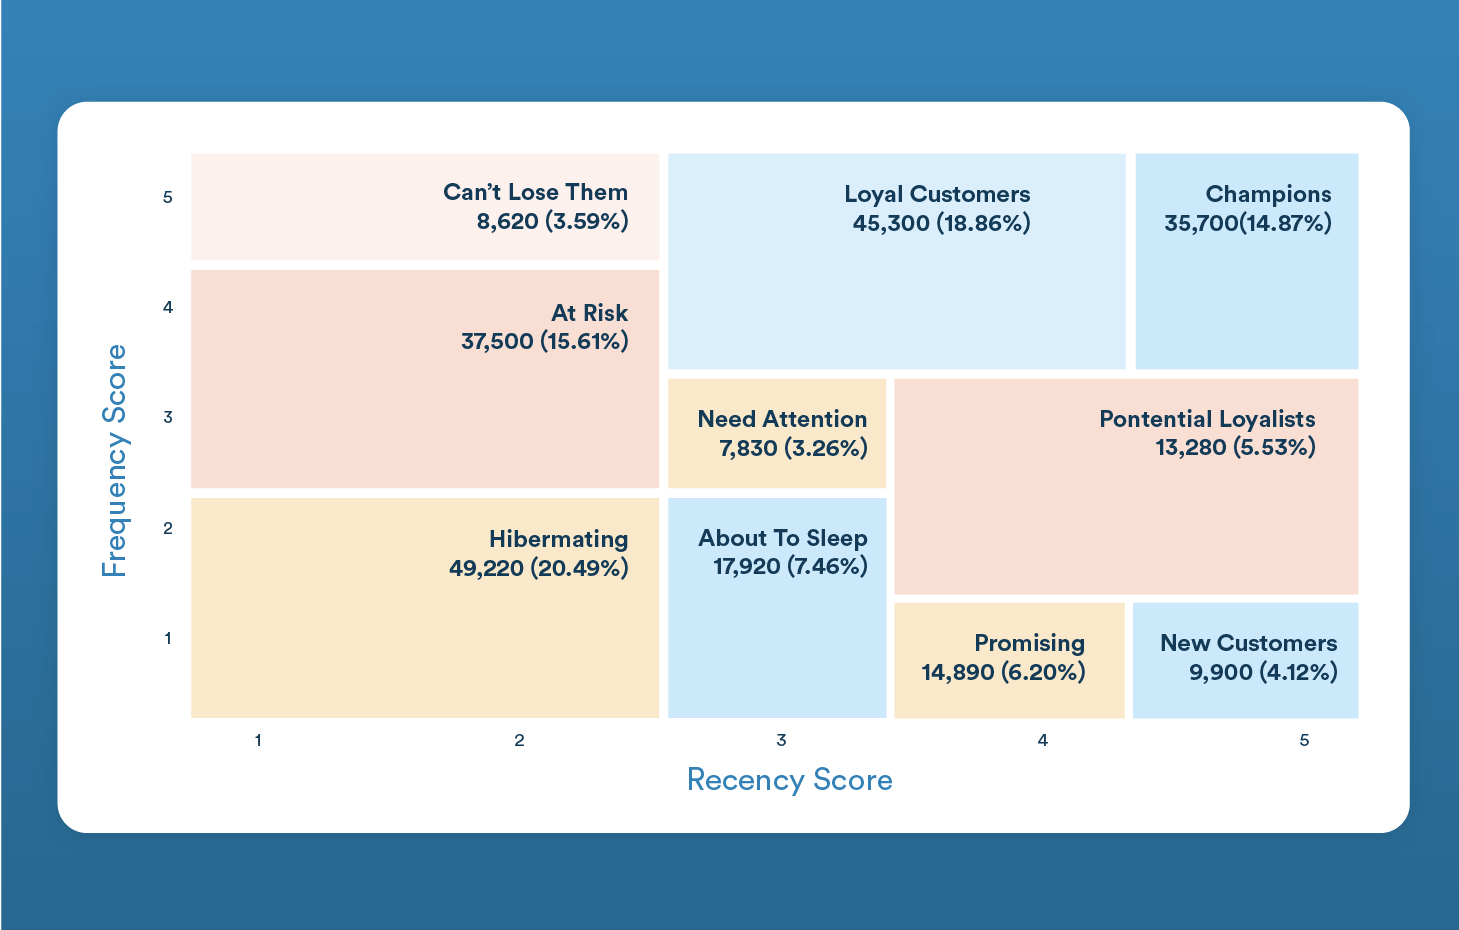

In [22]:
rfm_df[rfm_df['RFM_Score']=='515']

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
1,C100005,36,1,1200.34,5,1,5,515
30,C100130,59,1,1800.51,5,1,5,515
42,C100168,171,1,5250.00,5,1,5,515
56,C100211,135,1,2400.68,5,1,5,515
117,C100403,181,1,1500.40,5,1,5,515
...,...,...,...,...,...,...,...,...
99352,C997472,71,1,1500.40,5,1,5,515
99390,C998287,126,1,1500.40,5,1,5,515
99403,C998568,106,1,1200.34,5,1,5,515
99415,C998781,68,1,5250.00,5,1,5,515


In [23]:
rfm_df[rfm_df['RFM_Score']=='111']

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Score
15,C100088,764,1,5.23,1,1,1,111
39,C100156,733,1,20.92,1,1,1,111
64,C100242,788,1,5.23,1,1,1,111
80,C100291,674,1,35.19,1,1,1,111
141,C100472,723,1,5.23,1,1,1,111
...,...,...,...,...,...,...,...,...
99355,C997495,729,1,15.69,1,1,1,111
99384,C998154,766,1,5.23,1,1,1,111
99417,C998880,717,1,23.46,1,1,1,111
99421,C999000,825,1,5.23,1,1,1,111


In [24]:
def rfm_segmentation(df):
    if df['R'] >= 5 and df['F'] >= 5:
        return 'Champions'
    elif df['R'] >= 3 and df['F'] >= 4:
        return 'Loyal customers'
    elif df['R'] >= 4 and df['F'] <= 2:
        return 'Recent  Users'
    elif df['R'] <= 1 and df['F'] >= 3:
        return 'At risk'
    elif df['R'] <= 1 and df['F'] <= 1:
        return 'Lost'
    else:
        return 'Potential loyalist'

# Apply segmentation
rfm_df['Segment'] = rfm_df.apply(rfm_segmentation, axis=1)

# Display the segmented data
rfm_df.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
0,C100004,498,1,1500.40,3,1,5,315,Potential loyalist
1,C100005,36,1,1200.34,5,1,5,515,Recent Users
2,C100006,128,1,107.52,5,1,2,512,Recent Users
3,C100012,601,1,26.15,2,1,1,211,Potential loyalist
4,C100019,622,1,35.84,2,1,1,211,Potential loyalist


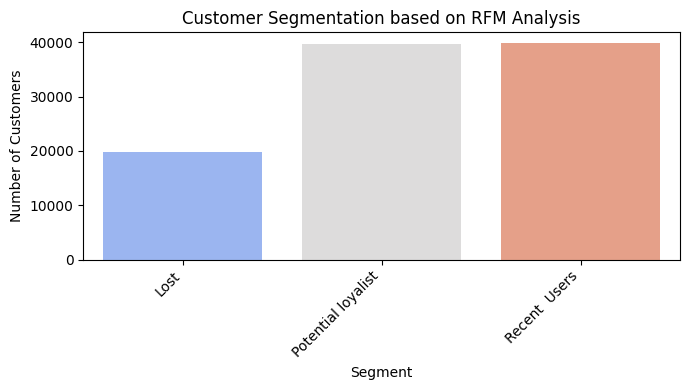

In [25]:
# Prepare the data for visualization

rfm_matrix = rfm_df.groupby('Segment').size().reset_index(name='Counts')



# Plot the matrix as a heatmap

plt.figure(figsize=(7, 4))

matrix = rfm_matrix.pivot_table(index='Segment', values='Counts', aggfunc='sum')



# Create a simple bar plot to simulate the matrix-like visualization

sns.barplot(x='Segment', y='Counts', data=rfm_matrix, palette='coolwarm')

plt.title('Customer Segmentation based on RFM Analysis')

plt.xticks(rotation=45, ha='right')

plt.ylabel('Number of Customers')

plt.tight_layout()



# Show the plot

plt.show()